In [40]:
# (9) Grabcut による大根領域の抜き出し
def mkGCmask(img,thickness=5):
    # カラー画像の場合はまずグレー画像に変換
    if img.ndim == 3:
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        gray = img.copy() # 副作用はないと思うが、念のため

    # 大きめのガウシアンフィルタでぼかした後に大津の方法で２階調化
    ksize = calcksize(gray) # RDForm で使う平滑化のカーネルサイズ
    bsize = ksize # 
    blur = cv2.GaussianBlur(gray,(bsize,bsize),0)  # ガウスぼかし                        
    coreimg = getMajorWhiteArea(blur,order) # ２値化して一番大きな領域だけ抽出
    
    # 膨張処理で確実に背景である領域をマスク
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(ksize,ksize)) # 円形カーネル
    mask1 = 255-cv2.dilate(coreimg,kernel,iterations = ksize+5)
    
    # 収縮処理で確実に内部である領域をマスク
    mask2 = cv2.erode(coreimg,kernel,iterations = ksize+5)

    return mask1,mask2

In [41]:
import cv2
import rdlib4 as rd

In [42]:
imgs = rd.collectimages('RDSamples')
img = imgs[0]

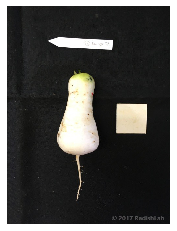

In [43]:
rd.plotimg(img)

In [44]:
!ls

'ls' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。


In [56]:
img = cv2.imread('__tmp.png',-1)

In [57]:
import matplotlib.pyplot as plt

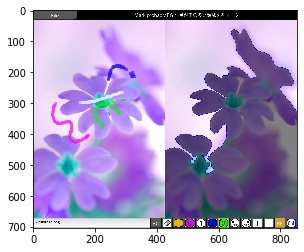

In [58]:
plt.imshow(img[:,:,:3])

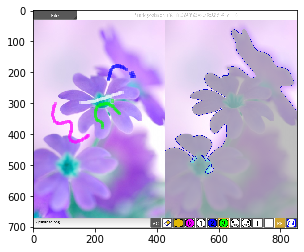

In [59]:
plt.imshow(img)

In [1]:
!python -m iGrabit

[INFO   ] [Logger      ] Record log in C:\Users\dan\.kivy\logs\kivy_20-02-27_5.txt
[INFO   ] [deps        ] Successfully imported "kivy_deps.gstreamer" 0.2.0
[INFO   ] [deps        ] Successfully imported "kivy_deps.angle" 0.2.0
[INFO   ] [deps        ] Successfully imported "kivy_deps.glew" 0.2.0
[INFO   ] [deps        ] Successfully imported "kivy_deps.sdl2" 0.2.0
[INFO   ] [Kivy        ] v1.11.1
[INFO   ] [Kivy        ] Installed at "C:\Users\dan\Anaconda3\envs\RL\lib\site-packages\kivy\__init__.py"
[INFO   ] [Python      ] v3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
[INFO   ] [Python      ] Interpreter at "C:\Users\dan\Anaconda3\envs\RL\python.exe"
[INFO   ] [Image       ] Providers: img_tex, img_dds, img_sdl2, img_pil, img_gif (img_ffpyplayer ignored)
[INFO   ] [Text        ] Provider: sdl2
[INFO   ] [Factory     ] 184 symbols loaded
[INFO   ] [Window      ] Provider: sdl2
[INFO   ] [GL          ] Using the "OpenGL" graphics system
[INFO   ] [GL          ] 

In [63]:
h,w=img3.shape[:2]

In [64]:
img3 = img3[32:h-64]

In [65]:
img3 = img3[:,0:w//2]

In [186]:
img = np.zeros((63,63,4),np.uint8)

In [178]:
res2 = cv2.imread('res/picdicpics/particle.png',-1)

In [187]:
circle = cv2.circle(img,(31,31),31,(255,255,255,255),-1)

In [188]:
circle = cv2.cvtColor(img,cv2.COLOR_BGRA2RGBA)

In [189]:
cv2.imwrite("dot.png",circle)

True

In [190]:
a = [1,2,3]
a.append(4)

In [191]:
a

[1, 2, 3, 4]

In [201]:
b = a.pop()

IndexError: pop from empty list

In [202]:
a

[]